<a href="https://colab.research.google.com/github/Tejasisnothere/NumDetectionUsingANN/blob/master/NumDetectionModelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


[np.int64(1), np.int64(2), np.int64(3)]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


class NeuralNetwork:
    def __init__(self, userdf, useroutputdf, inputLayer, hiddenLayer, outputLayer, learningRate=0.001, hyperparam=0.01):
        self.inputLayer = inputLayer
        self.hiddenLayer = hiddenLayer
        self.outputLayer = outputLayer
        self.learningRate = learningRate
        self.hyperparam = hyperparam
        self.df = userdf
        self.weights = []
        self.biases = []
        self.netOutputs  = []
        self.postactivationOutputs = []
        self.predictions = []
        self.actualOutputs = []
        self.outdf = useroutputdf

    def leakyRELU(self, arr):
        return np.array([i if i>0 else self.hyperparam*i for i in arr])


    def extractInput(self, i):

        arr = np.zeros(10)
        arr[self.outdf[i]] = 1
        return self.df[i].flatten(), arr

    def softmax(self, arr):
        exps = np.exp(arr - np.max(arr))
        return exps / np.sum(exps)

    def backPropogation(self, pred, actual, inputs):

            dl_by_dzfinal = pred - actual.flatten()

            dl_by_dh = self.weights[1].T @ dl_by_dzfinal

            leaky_derviative_firstLayr = np.array([1 if val > 0 else self.hyperparam for val in self.netOutputs[0]])

            dl_by_dzh = dl_by_dh * leaky_derviative_firstLayr

            grad_w1 = np.outer(dl_by_dzh, inputs)
            grad_b1 = dl_by_dzh

            grad_w2 = np.outer(dl_by_dzfinal, self.postactivationOutputs[0])
            grad_b2 = dl_by_dzfinal

            self.weights[0] -= self.learningRate * grad_w1
            self.biases[0] -= self.learningRate * grad_b1
            self.weights[1] -= self.learningRate * grad_w2
            self.biases[1] -= self.learningRate * grad_b2

    def forwardBackwardPass(self, i):
        self.netOutputs = []
        self.postactivationOutputs = []
        inp = self.extractInput(i=i)

        output = self.feedForward(inp[0])

        pred = self.softmax(output)
        self.predictions.append(np.argmax(pred))

        print(f'pred: {pred}, actual: {inp[1]}')
        self.backPropogation(pred=pred, actual=inp[1], inputs=inp[0])





    def learn(self):
        for i in range(len(self.df)):




            self.forwardBackwardPass(i=i)

    def feedForward(self, inputVal):

        r1 = inputVal @self.weights[0].T + self.biases[0]
        a1 = self.leakyRELU(r1)

        self.netOutputs.append(r1)
        self.postactivationOutputs.append(a1)

        r2 = a1 @ self.weights[1].T + self.biases[1]



        self.netOutputs.append(r2)


        return r2

    def predict(self, inp):

      r1 = inp @self.weights[0].T + self.biases[0]
      a1 = self.leakyRELU(r1)
      r2 = a1 @ self.weights[1].T + self.biases[1]

      print(r2, list(r2).index(max(list(r2))))

    def NN_init(self):
        self.predictions = []
        self.actualOutputs = []

        w1 = np.random.rand(self.hiddenLayer, self.inputLayer)  * 0.01
        w2 = np.random.rand(self.outputLayer, self.hiddenLayer) * 0.01

        self.weights.append(w1)
        self.weights.append(w2)

        z1 = np.zeros(shape=(self.hiddenLayer))
        z2 = np.zeros(shape=(self.outputLayer))
        self.biases.append(z1)
        self.biases.append(z2)

NN = NeuralNetwork(x_train, y_train, 784, 1000, 10)
NN.NN_init()

NN.learn()




Streaming output truncated to the last 5000 lines.
 7.68499358e-05 9.33328649e-01 1.67762566e-03 8.55432125e-06
 5.71452444e-03 1.21288067e-05], actual: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
pred: [3.65644888e-05 1.13238177e-02 3.07207442e-03 1.01590021e-01
 7.91876071e-02 2.83053880e-03 2.55251905e-04 2.34607616e-01
 7.68247570e-02 4.90271752e-01], actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
pred: [0.00040049 0.02425011 0.01349619 0.04084736 0.31623647 0.03058107
 0.01501151 0.01213776 0.28597184 0.2610672 ], actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
pred: [6.64917494e-04 8.15922879e-06 1.99010823e-03 9.91612774e-01
 4.05951866e-06 1.95970496e-03 2.16208184e-06 1.91609901e-05
 3.11550360e-03 6.23449397e-04], actual: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
pred: [1.89786339e-03 1.46631382e-04 7.98334899e-03 4.48226766e-04
 9.17801992e-04 1.31697047e-02 1.71525993e-03 2.82016190e-04
 9.52798665e-01 2.06404820e-02], actual: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
pred: [2.30098359e-06 9.64735670e-01 1.49384882e-02 

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, NN.predictions)

0.5928461089214645

In [ ]:

len(y_train)

60000

In [ ]:
len(NN.predictions)

60000

In [ ]:
good_weights = NN.weights
good_biases = NN.biases

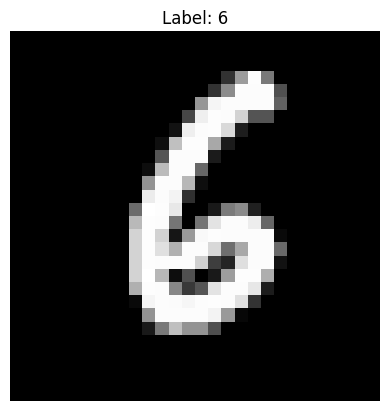

In [ ]:
import matplotlib.pyplot as plt
from random import randint

index = randint(0, 50000)


plt.imshow(x_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()


flattened = x_train[index].flatten()



In [ ]:
import matplotlib.pyplot as plt
from random import randint

index = randint(0, 50000)


plt.imshow(x_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()


flattened = x_train[index].flatten()


def leakyRELU( arr):
        return np.array([i if i>0 else 0.01*i for i in arr])



def predict( inp):

      ro1 = inp @ good_weights[0].T + good_biases[0]
      ao1 = leakyRELU(ro1)
      ro2 = ao1 @ good_weights[1].T + good_biases[1]

      print("prediction", list(ro2).index(max(list(ro2))))

predict(flattened)


prediction 6


In [ ]:
print(f"Score: {r2_score(y_train,NN.predictions[60000:])}")

In [ ]:
import pickle
goodweights2 = NN.weights
goodbiases = NN.biases

In [ ]:
import pickle

In [ ]:
gw = None
gb = None
with open('data.pkl', 'rb') as f:
  gw, gb = pickle.load(f)


In [ ]:
gw

[array([[0.00338381, 0.00135181, 0.00262439, ..., 0.00641937, 0.00831148,
         0.00463276],
        [0.00667539, 0.00695587, 0.00149283, ..., 0.0072251 , 0.00518924,
         0.00631998],
        [0.00680794, 0.00512169, 0.00839319, ..., 0.00656783, 0.00174719,
         0.00175383],
        ...,
        [0.00224781, 0.00846472, 0.00875846, ..., 0.0047845 , 0.00790359,
         0.00254815],
        [0.00802594, 0.00708584, 0.00120399, ..., 0.00940138, 0.00399985,
         0.00189699],
        [0.00666369, 0.00072375, 0.00937344, ..., 0.00838756, 0.00165892,
         0.00100358]]),
 array([[ 0.08588109, -0.08258255,  0.06003737, ...,  0.0741591 ,
          0.0742332 ,  0.01191634],
        [-0.07259356,  0.05942396,  0.00275401, ..., -0.03684006,
         -0.04411458, -0.03529584],
        [ 0.0525066 , -0.068527  , -0.05722995, ...,  0.07450603,
          0.03012612, -0.06254348],
        ...,
        [ 0.02341494,  0.07207694, -0.04453579, ..., -0.01819044,
          0.06582756, -0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


class NeuralNetwork:
    def __init__(self, userdf, useroutputdf, inputLayer, hiddenLayer, outputLayer, learningRate=0.001, hyperparam=0.01):
        self.inputLayer = inputLayer
        self.hiddenLayer = hiddenLayer
        self.outputLayer = outputLayer
        self.learningRate = learningRate
        self.hyperparam = hyperparam
        self.df = userdf
        self.weights = gw
        self.biases = gb
        self.netOutputs  = []
        self.postactivationOutputs = []
        self.predictions = []
        self.actualOutputs = []
        self.outdf = useroutputdf

    def leakyRELU(self, arr):
        return np.array([i if i>0 else self.hyperparam*i for i in arr])


    def extractInput(self, i):

        arr = np.zeros(10)
        arr[self.outdf[i]] = 1
        return self.df[i].flatten(), arr

    def softmax(self, arr):
        exps = np.exp(arr - np.max(arr))
        return exps / np.sum(exps)

    def backPropogation(self, pred, actual, inputs):

            dl_by_dzfinal = pred - actual.flatten()

            dl_by_dh = self.weights[1].T @ dl_by_dzfinal

            leaky_derviative_firstLayr = np.array([1 if val > 0 else self.hyperparam for val in self.netOutputs[0]])

            dl_by_dzh = dl_by_dh * leaky_derviative_firstLayr

            grad_w1 = np.outer(dl_by_dzh, inputs)
            grad_b1 = dl_by_dzh

            grad_w2 = np.outer(dl_by_dzfinal, self.postactivationOutputs[0])
            grad_b2 = dl_by_dzfinal

            self.weights[0] -= self.learningRate * grad_w1
            self.biases[0] -= self.learningRate * grad_b1
            self.weights[1] -= self.learningRate * grad_w2
            self.biases[1] -= self.learningRate * grad_b2

    def forwardBackwardPass(self, i):
        self.netOutputs = []
        self.postactivationOutputs = []
        inp = self.extractInput(i=i)

        output = self.feedForward(inp[0])

        pred = self.softmax(output)
        self.predictions.append(np.argmax(pred))

        print(f'pred: {pred}, actual: {inp[1]}')
        self.backPropogation(pred=pred, actual=inp[1], inputs=inp[0])





    def learn(self):
        for i in range(len(self.df)):




            self.forwardBackwardPass(i=i)

    def feedForward(self, inputVal):

        r1 = inputVal @self.weights[0].T + self.biases[0]
        a1 = self.leakyRELU(r1)

        self.netOutputs.append(r1)
        self.postactivationOutputs.append(a1)

        r2 = a1 @ self.weights[1].T + self.biases[1]



        self.netOutputs.append(r2)


        return r2

    def predict(self, inp):

      r1 = inp @self.weights[0].T + self.biases[0]
      a1 = self.leakyRELU(r1)
      r2 = a1 @ self.weights[1].T + self.biases[1]

      print(r2, list(r2).index(max(list(r2))))

    def NN_init(self):
        self.predictions = []
        self.actualOutputs = []

        w1 = np.random.rand(self.hiddenLayer, self.inputLayer)  * 0.01
        w2 = np.random.rand(self.outputLayer, self.hiddenLayer) * 0.01

        self.weights.append(w1)
        self.weights.append(w2)

        z1 = np.zeros(shape=(self.hiddenLayer))
        z2 = np.zeros(shape=(self.outputLayer))
        self.biases.append(z1)
        self.biases.append(z2)

NN = NeuralNetwork(x_train, y_train, 784, 1000, 10)


NN.learn()




Streaming output truncated to the last 5000 lines.
 2.40933905e-01 2.68878366e-02 3.29048246e-03 1.09894279e-02
 1.66510656e-01 4.44122616e-01], actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
pred: [8.03472521e-04 3.57263729e-06 4.20862131e-03 9.90077843e-01
 5.52299837e-07 2.08452071e-03 1.66991678e-07 2.47602575e-06
 2.50320598e-03 3.15568993e-04], actual: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
pred: [6.33833610e-04 3.60331279e-05 9.82068063e-03 1.50079587e-04
 2.94970132e-04 5.09613955e-03 4.27814592e-04 9.60186178e-05
 9.75388248e-01 8.05618165e-03], actual: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
pred: [1.51867929e-06 9.78173383e-01 1.01111520e-02 1.81283002e-03
 2.24182620e-04 2.13838095e-04 1.74100557e-04 3.42073807e-03
 5.70607663e-03 1.62180702e-04], actual: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
pred: [2.86347511e-07 3.81250657e-09 1.84639156e-04 9.99607430e-01
 3.40084841e-10 1.20129087e-05 3.62544903e-12 4.65815756e-05
 6.01975735e-05 8.88484070e-05], actual: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
pred: [2.69

In [ ]:
r2_score(y_train, NN.predictions)

0.8389964304710749

In [ ]:
with open('data2.pkl', 'rb') as f:
  r1, r2 = pickle.load(f)
r2

[array([-6.54053350e-03,  2.91031434e-02,  2.25916664e-02, -5.13751336e-02,
         3.75295286e-02, -2.66755893e-03,  2.54630061e-02, -2.70430956e-02,
        -4.86694996e-02,  7.31923041e-03,  4.61318895e-03,  1.35686754e-02,
         8.71781826e-03,  3.59320044e-03, -1.00386150e-03, -5.68581335e-03,
         1.84242277e-03,  1.54393958e-02, -4.52948932e-02,  1.28581380e-02,
        -4.95363550e-03, -1.29219391e-02, -1.17727501e-02,  6.19949764e-03,
         2.21146515e-02, -2.70226836e-03, -3.34899128e-02, -1.46007626e-03,
        -3.33839899e-04, -2.13147326e-05, -1.08143869e-02, -2.33481160e-02,
        -2.65054849e-03, -6.39475833e-03, -1.75222720e-02, -3.29816395e-02,
         3.53565582e-02, -3.57768019e-02,  1.74766313e-02, -3.00947266e-02,
        -3.92807837e-02, -1.21634826e-02, -2.88173168e-02, -3.31970157e-02,
         2.66175810e-02, -3.12089684e-02,  1.41374533e-02,  4.35900279e-03,
         5.60825081e-02, -3.32380123e-02, -2.45079389e-02, -2.87975715e-02,
        -6.7

In [ ]:
test_pred = []

In [ ]:
NN.predict(x_test[0].flatten())

[ 2.5465768  -6.41301503  3.84401011  6.06443078 -3.18675446  2.55536406
 -9.06935671 11.84335678  1.50271938  4.42388495] 7


In [ ]:
goodweights = NN.weights
goodbiases = NN.biases

In [ ]:
import matplotlib.pyplot as plt
from random import randint

# index = randint(0, 50000)


# plt.imshow(x_train[index], cmap='gray')
# plt.title(f"Label: {y_train[index]}")
# plt.axis('off')
# plt.show()


# flattened = x_train[index].flatten()


def leakyRELU( arr):
        return np.array([i if i>0 else 0.01*i for i in arr])


predictions = []
def predict( inp, ws, bs, arr):

      ro1 = inp @ ws[0].T + bs[0]
      ao1 = leakyRELU(ro1)
      ro2 = ao1 @ ws[1].T + bs[1]

      # print("prediction", list(ro2).index(max(list(ro2))))
      arr.append(list(ro2).index(max(list(ro2))))

for i in x_test:
  predict(i.flatten(), goodweights, goodbiases, predictions)


In [ ]:
r2_score(y_test, predictions)

0.8385130259393183